In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('precision', 3)
from T5 import repetitions
rep_obj = repetitions()

<h1> Subjective Evaluation - Analysing users' ratings </h1>

In [2]:
columns = ['timestamp', 'username', 'isRandom', 'title', 'genres', 'kw', 'plot', 'overall', 'coherence', 'logic', 'interest', 'comment']
rank_cols = ['overall', 'coherence', 'logic', 'interest']
df = pd.read_csv('ranking.csv', names=columns)
df = df.drop(["timestamp"], axis=1).drop_duplicates()

In [3]:
df

,username,isRandom,title,genres,kw,plot,overall,coherence,logic,interest,comment
0,MOST,True,Super Model,comedy,"Omri, stage, Tel-Aviv, medal","Omri. a young girl from Tel-Aviv, gets a job a...",2,2,2,2.0,not good
1,MOST,True,Super Model,science fiction,"Omri, stage, Tel-Aviv, medal","Omri. the supermodel of the film, is sent to T...",1,1,1,1.0,bad
2,Atar,True,The Atudai that wasn't,"action, comedy","Alicia, basement, kidnapped, chef, cook",The plot revolves around Alicia. a young woman...,5,4,4,5.0,NaN
3,Atar,True,"The good, the bad and the Rakefet",western,"Rakefet, Kineret, duel, wild west",The film tells the story of the Rakefet. a gan...,5,4,4,5.0,NaN
4,Atar,True,90 and up,comedy,"Shlomi Laufer, university, useless, dumb",Shlomi Laufer is a high school senior who is o...,5,3,3,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,False,The journey,"action, comedy, fantasy","The, journey,",The journey is about a group of young people w...,5,4,4,4.0,NaN
181,NaN,False,Hi,"action, comedy, fantasy",Hi,Hi tells the story of a young boy who is kidna...,4,3,4,4.0,NaN
182,NaN,False,Going on vacation,"comedy, drama, romance","Going, on, vacation,",The film tells the story of a young couple who...,4,4,5,3.0,NaN
183,allison,True,I Don't Know How She Does It,"comedy, drama","night, allison, kate, momo, responsibility, de...",The film is set in a small town in New York Ci...,4,3,3,5.0,NaN


<h3> Human evaluation results on four aspects: coherence, logic, interest, and overall </h3> 

In [4]:
df[rank_cols].describe()

,overall,coherence,logic,interest
count,183.000,183.000,183.000,182.000
mean,3.475,3.628,3.120,3.681
std,1.128,1.211,1.234,1.183
min,1.000,1.000,1.000,1.000
25%,3.000,3.000,2.000,3.000
50%,4.000,4.000,3.000,4.000
75%,4.000,5.000,4.000,5.000
max,5.000,5.000,5.000,5.000


<h2> Subjective and Objective Combined Evaluation </h2> 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


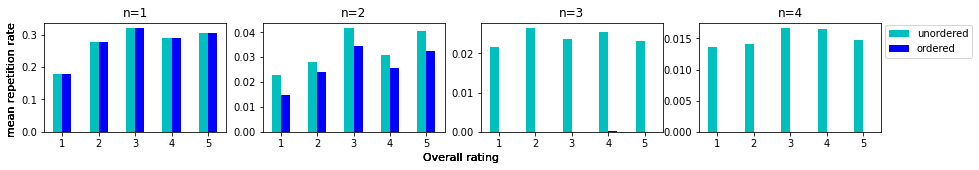

In [5]:
fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(15,2))
# axes = axes.ravel()
for n in [1, 2, 3, 4]:
    tmp_list = []
    for rep_type in ['sorted', 'original']:
        rep_obj.order = rep_type
        _, intra = rep_obj.intra_repetitions(n, df['plot'])
        df[f'intra_{rep_type}_{n}'] = intra
        tmp_list.append(f'intra_{rep_type}_{n}')
    if n!=4:
        df[['overall']+tmp_list].groupby(by='overall').mean().plot.bar(ax=axes[n-1], color=['c','b'], rot=1).legend_.remove()
    else:
        tmp_list_new = ['ordered' if 'original' in x else 'unordered' for x in tmp_list]
        df = df.rename(columns={tmp_list[k]:tmp_list_new[k] for k in range(len(tmp_list))})
        df[['overall']+tmp_list_new].groupby(by='overall').mean().plot.bar(ax=axes[n-1], color = ['c','b'], rot=1)
    axes[3].legend(loc=(1.02,0.68))
    axes[n-1].set_title(f'n={n}')
    axes[n-1].set_xlabel(None)
    fig.add_subplot(1, 1, 1, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
# Adding the x-axis and y-axis labels for the bigger plot
    plt.xlabel('Overall rating ', fontsize=11)
    plt.ylabel('mean repetition rate ', fontsize=11)

<h1> Automatic Evaluation for test-set and users' outputs </h1>

In [6]:
columns = ['timestamp', 'title', 'genres', 'kw', 'plot']
output = pd.read_csv('results.csv', names=columns)
output = output.drop(["timestamp"], axis=1).drop_duplicates()

In [7]:
output

,title,genres,kw,plot
0,hello,"action, comedy","hi, what",The film tells the story of a group of gangste...
2,Super Model,comedy,"Omri, stage, Tel-Aviv, medal","Omri. a young girl from Tel-Aviv, gets a job a..."
3,Super Model,science fiction,"Omri, stage, Tel-Aviv, medal","Omri. the supermodel of the film, is sent to T..."
4,love or hate,"drama, romance","love, or, hate",The film tells the story of a man who falls in...
6,love or hate,"drama, romance","Jerusalem, gold, nutrition",The film is set in Jerusalem in the early 20th...
...,...,...,...,...
386,Sex In The Snow,"romance, sport","Jonathan, ski, Elza, sex, snow, dirty","Jonathan. a ski instructor, and his girlfriend..."
387,Sex In The Snow,"action, romance, sport","Jonathan, ski, Elza, sex, snow, dirty","Jonathan. a ski instructor, and his girlfriend..."
388,The Movie Plot Generator,"comedy, horror","project, creative, generate",The movie plot generator is about a group of c...
389,The Movie Plot Generator,"comedy, horror","project, creative, generate, language processing",The movie plot generator is used to generate a...


In [8]:
file = 'data/full_model_beams.csv' #enter the file path from the comparison.py file
testset = pd.read_csv(file)
testset = testset[['Title', 'new_genres', 'kw_Rake_p3', 'full_model_9_beams',]]\
.rename(columns={"Title": "title", "new_genres": "genres", "kw_Rake_p3": "kw", "full_model_9_beams": "plot"})

In [9]:
testset

,title,genres,kw,plot
0,The Soul's Cycle,drama,"lover, wrong, arthur","The Soul's Cycle tells the story of Arthur, a ..."
1,A Sailor-Made Man,comedy,"relaxing, marry, box, strikes, accepts, blame,...",The Stooges are sailor-made men who spend thei...
2,Broken Hearts of Hollywood,"comedy, drama","fringe, enrolls, film, completed, mother, hal",The film is set in Los Angeles on the fringe o...
3,Road to Paradise,drama,"thieves, closely, open, shocked, find, woman, ...",The film tells the story of a group of thieves...
4,Discarded Lovers,mystery,"car, finished, film, administer, ex-husband",The film begins with a woman being robbed of h...
...,...,...,...,...
293,Generation X,science fiction,"school, refrax, mock, experiments",The film follows a group of high school studen...
294,Hanna K.,drama,"hanna, infiltration, village, disappeared, sto...",Hanna K. is a young woman who lives in a small...
295,I Killed the Count,"comedy, mystery","tricky, murdered, witnesses, opportunity",The plot of I Killed the Count is a bit tricky...
296,Stolen Holiday,"crime, drama, romance","fund, police, questioning, agree, marry",The film tells the story of a gangster who rob...


In [10]:
output['origin'] = 'users'
testset['origin'] = 'testset'

<h3> combined generations </h3>

In [11]:
combined = pd.concat([output, testset])

In [12]:
combined

,title,genres,kw,plot,origin
0,hello,"action, comedy","hi, what",The film tells the story of a group of gangste...,users
2,Super Model,comedy,"Omri, stage, Tel-Aviv, medal","Omri. a young girl from Tel-Aviv, gets a job a...",users
3,Super Model,science fiction,"Omri, stage, Tel-Aviv, medal","Omri. the supermodel of the film, is sent to T...",users
4,love or hate,"drama, romance","love, or, hate",The film tells the story of a man who falls in...,users
6,love or hate,"drama, romance","Jerusalem, gold, nutrition",The film is set in Jerusalem in the early 20th...,users
...,...,...,...,...,...
293,Generation X,science fiction,"school, refrax, mock, experiments",The film follows a group of high school studen...,testset
294,Hanna K.,drama,"hanna, infiltration, village, disappeared, sto...",Hanna K. is a young woman who lives in a small...,testset
295,I Killed the Count,"comedy, mystery","tricky, murdered, witnesses, opportunity",The plot of I Killed the Count is a bit tricky...,testset
296,Stolen Holiday,"crime, drama, romance","fund, police, questioning, agree, marry",The film tells the story of a gangster who rob...,testset


In [13]:
rep_obj = repetitions()

In [14]:
for rep_type in ['sorted', 'original']:
    rep_obj.order = rep_type
    for n in [1, 2, 3, 4]:
        _, intra = rep_obj.intra_repetitions(n, combined['plot'])
        combined[f'intra_{rep_type}_{n}'] = intra

In [15]:
rep_cols = ['intra_sorted_1', 'intra_sorted_2', 'intra_sorted_3', 'intra_sorted_4',\
            'intra_original_1', 'intra_original_2', 'intra_original_3', 'intra_original_4']
combined[rep_cols].describe()

,intra_sorted_1,intra_sorted_2,intra_sorted_3,intra_sorted_4,intra_original_1,intra_original_2,intra_original_3,intra_original_4
count,629.000,629.000,629.000,629.000,629.000,629.000,6.290e+02,6.290e+02
mean,0.303,0.036,0.024,0.015,0.303,0.031,1.567e-04,4.378e-05
std,0.093,0.032,0.024,0.019,0.093,0.030,1.673e-03,7.928e-04
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00
25%,0.245,0.014,0.000,0.000,0.245,0.000,0.000e+00,0.000e+00
50%,0.308,0.031,0.020,0.010,0.308,0.024,0.000e+00,0.000e+00
75%,0.364,0.053,0.037,0.024,0.364,0.046,0.000e+00,0.000e+00
max,0.559,0.167,0.152,0.136,0.559,0.151,3.077e-02,1.667e-02


<h1> Epochs Comparison </h1>

In [16]:
checkpoints = pd.read_csv('checkpoints_res.csv')
checkpoints
epochs_names = [f'plot_epoch_{i}' for i in [5,7,8,9,10]]
rep_obj = repetitions()
results = rep_obj.calc_rep(checkpoints[epochs_names[0]].values)
results['Name'] = epochs_names[0].split('_')[2]
epoch_df = pd.DataFrame(results, index=[0])
for name in epochs_names[1:]:
    results = rep_obj.calc_rep(checkpoints[name].values)
    results['Name'] = name.split('_')[2]
    epoch_df= epoch_df.append(results, ignore_index=True)

sorted
original
sorted
original
sorted
original
sorted
original
sorted
original


Text(0.5, 0, 'Number of epochs ')

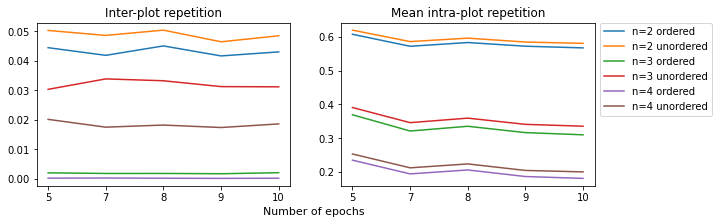

In [17]:
import matplotlib.pyplot as plt
inter_cols = [f'intra_{i}_mean_sorted' for i in [2,3,4]] + [f'intra_{i}_mean_original' for i in [2,3,4]]
inter_cols_fixed = [x.replace('sorted','unordered').replace('original','ordered') for x in inter_cols]
inter_cols_fixed = ['n='+' '.join([k.split('_')[1],k.split('_')[3]]) for k in inter_cols_fixed]
intra_cols = [f'inter_{i}_sorted' for i in [2,3,4]] + [f'inter_{i}_original' for i in [2,3,4]]
intra_cols_fixed = [x.replace('sorted','unordered').replace('original','ordered') for x in intra_cols]
intra_cols_fixed = ['n='+' '.join(k.split('_')[1:]) for k in intra_cols_fixed]
# epoch_df['Name'] = epoch_df['Name'].apply(lambda x: x.split('_')[1])
epoch_df_inter = epoch_df[['Name']+inter_cols]
epoch_df_inter = epoch_df_inter.rename(columns={inter_cols[k]:inter_cols_fixed[k] for k in range(len(inter_cols))})
epoch_df_intra = epoch_df[['Name']+intra_cols]
epoch_df_intra = epoch_df_intra.rename(columns={intra_cols[k]:intra_cols_fixed[k] for k in range(len(inter_cols))})
inter_cols_fixed = sorted(inter_cols_fixed)
intra_cols_fixed = sorted(intra_cols_fixed)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,3))
epoch_df_inter.plot(x='Name',y=inter_cols_fixed, ax=axes[0]).legend_.remove()  
epoch_df_intra.plot(x='Name',y=intra_cols_fixed, ax=axes[1])
axes[0].set_title('Inter-plot repetition')
axes[0].set_xlabel(None)
# axes[0].axvline(x=4, color='#BEBEBE', linestyle='--', linewidth=1)
axes[1].title.set_text('Mean intra-plot repetition')
axes[1].set_xlabel(None)
axes[1].legend(loc=(1.02,0.43))
# axes[1].axvline(x=4, color='#BEBEBE', linestyle='--', linewidth=1)
fig.add_subplot(1, 1, 1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# Adding the x-axis and y-axis labels for the bigger plot
plt.xlabel('Number of epochs ', fontsize=11)

<h1> Generation Configuration </h1>

In [18]:
file = 'data/full_model_beams.csv' #enter the file path from the comparison.py file
testset = pd.read_csv(file)

beams = [f'full_model_{i}_beams' for i in [3,5,7,9,10,12]]
rep_obj = repetitions()
results = rep_obj.calc_rep(testset[beams[0]].values)
results['Name'] = beams[0]
df = pd.DataFrame(results, index=[0])
for name in beams[1:]:
    results = rep_obj.calc_rep(testset[name].values)
    results['Name'] = name
    df = df.append(results, ignore_index=True)

sorted
original
sorted
original
sorted
original
sorted
original
sorted
original
sorted
original


Text(0.5, 0, 'Number of beams ')

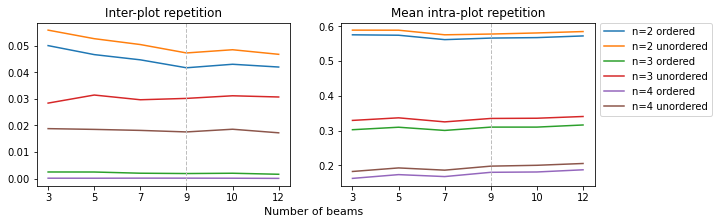

In [19]:
import matplotlib.pyplot as plt
inter_cols = [f'intra_{i}_mean_sorted' for i in [2,3,4]] + [f'intra_{i}_mean_original' for i in [2,3,4]]
inter_cols_fixed = [x.replace('sorted','unordered').replace('original','ordered') for x in inter_cols]
inter_cols_fixed = ['n='+' '.join([k.split('_')[1],k.split('_')[3]]) for k in inter_cols_fixed]
intra_cols = [f'inter_{i}_sorted' for i in [2,3,4]] + [f'inter_{i}_original' for i in [2,3,4]]
intra_cols_fixed = [x.replace('sorted','unordered').replace('original','ordered') for x in intra_cols]
intra_cols_fixed = ['n='+' '.join(k.split('_')[1:]) for k in intra_cols_fixed]
df['Name'] = df['Name'].apply(lambda x: x.split('_')[2])
# df.rename(columns={'Name': ' '
df_inter = df[['Name']+inter_cols]
df_inter = df_inter.rename(columns={inter_cols[k]:inter_cols_fixed[k] for k in range(len(inter_cols))})
df_intra = df[['Name']+intra_cols]
df_intra = df_intra.rename(columns={intra_cols[k]:intra_cols_fixed[k] for k in range(len(inter_cols))})
inter_cols_fixed = sorted(inter_cols_fixed)
intra_cols_fixed = sorted(intra_cols_fixed)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,3))
plt.annotate('Beam number for beam search',xy=(-0.5,0.5))
df_inter.plot(x='Name',y=inter_cols_fixed, ax=axes[0]).legend_.remove()  
df_intra.plot(x='Name',y=intra_cols_fixed, ax=axes[1])
axes[0].title.set_text('Inter-plot repetition')
axes[0].set_xlabel(None)
axes[0].axvline(x=3, color='#BEBEBE', linestyle='--', linewidth=1)
axes[1].title.set_text('Mean intra-plot repetition')
axes[1].set_xlabel(None)
axes[1].legend(loc=(1.02,0.43))
axes[1].axvline(x=3, color='#BEBEBE', linestyle='--', linewidth=1)
fig.add_subplot(1, 1, 1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# Adding the x-axis and y-axis labels for the bigger plot
plt.xlabel('Number of beams ', fontsize=11)